In [1]:
Train_Path = "CovidDataset/Train"
Test_Path = "CovidDataset/Val"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [3]:
train_data_gen = image.ImageDataGenerator(rescale= 1./255,horizontal_flip= True,zoom_range= 0.2, shear_range= 0.2) 
#Do some augmentation on the image shear and zoom allow random crops

#the call a method object we do binary classification targetsize reshape our images
train = train_data_gen.flow_from_directory(directory= Train_Path , target_size=(256,256),batch_size=16, class_mode='binary')

Found 224 images belonging to 2 classes.


In [4]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [5]:
test_data_gen = image.ImageDataGenerator(rescale= 1./255) #we are not argument in this case

test = test_data_gen.flow_from_directory(directory= Test_Path , target_size=(256,256),batch_size=16, class_mode='binary')

Found 60 images belonging to 2 classes.


In [6]:
# #CNN Based model in keras #change no of filters
model = Sequential() #initial sequential
model.add(Conv2D(filters = 32, kernel_size=(3,3),activation="relu",input_shape = (256,256,3))) #3 channel as rgb image
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu")) #relu means non linearity #increase no of filters
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#similarly add cn layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics = ['acc']) #pass a loss

In [7]:
model.summary() #no of params increasing

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

In [8]:
history = model.fit(train,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data=test) #train our model

Epoch 1/10
8/8 [==============================] - 25s 3s/step - loss: 1.4870 - acc: 0.5000 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 0.6746 - acc: 0.6641 - val_loss: 0.6701 - val_acc: 0.8750
Epoch 3/10
8/8 [==============================] - 24s 3s/step - loss: 0.5993 - acc: 0.6641 - val_loss: 0.4616 - val_acc: 0.9062
Epoch 4/10
8/8 [==============================] - 23s 3s/step - loss: 0.3918 - acc: 0.8750 - val_loss: 0.3561 - val_acc: 0.9688
Epoch 5/10
8/8 [==============================] - 30s 4s/step - loss: 0.3819 - acc: 0.8516 - val_loss: 0.2968 - val_acc: 0.9375
Epoch 6/10
8/8 [==============================] - 23s 3s/step - loss: 0.2897 - acc: 0.8750 - val_loss: 0.2962 - val_acc: 1.0000
Epoch 7/10
8/8 [==============================] - 27s 3s/step - loss: 0.2952 - acc: 0.8672 - val_loss: 0.1398 - val_acc: 1.0000
Epoch 8/10
8/8 [==============================] - 24s 3s/step - loss: 0.2273 - acc: 0.9141 - val_loss: 0

In [9]:
path ="img_covid\covid3.jpeg"
img =image.load_img(path,target_size=(256,256))
img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [10]:
a =model.predict(img) 
np.round(a).astype(int)

array([[0]])

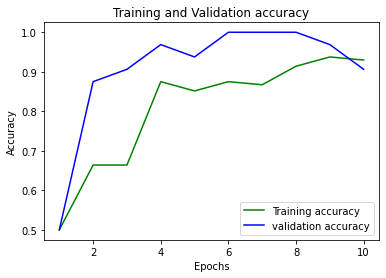

In [12]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


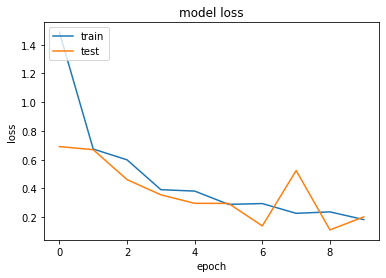

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()